# Dataset Description

Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

    Dataset Characteristics: Multivariate
    Attribute Characteristics: Categorical, Integer
    Task: Classification
    Number of Instances: 45211
    Number of Attributes: 17
    Area: Business

Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### Dataset Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010)

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Attribute Information:

### Input variables:

#### Bank Client Data:

    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    
#### Related with the Last Contact of the Current Campaign:

    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric).
    
#### Other Attributes:

    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    
#### Social and Economic Context Attributes:

    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output Variable (Desired Target):

    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Ignore Warnings

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [4]:
# Importing the classification dataset 

bank = pd.read_csv('bank-additional-full.csv', sep = ';')

In [5]:
# Data exploration 

bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
len(bank.loc[:, 'pdays'].unique())
((bank['pdays'] == 999).sum())/len(bank['pdays'])

27

0.9632174419733903

In [7]:
# Checking the data type of each column

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [8]:
bank.shape

(41188, 21)

In [9]:
# Checking for null values 

bank.isnull().any()
bank.isnull().sum()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
# Descriptive Statistics 

bank.describe()                    # For numerical columns 
bank.describe(include = ['O'])     # For categorical columns

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [11]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Basic Analysis 

Text(0.5, 1.0, 'Distribution of data by age')

Text(0.5, 1.0, 'Distribution of data by campaign')

Text(0.5, 1.0, 'Distribution of data by employment variation rate')

Text(0.5, 1.0, 'Distribution of data by consumer price index')

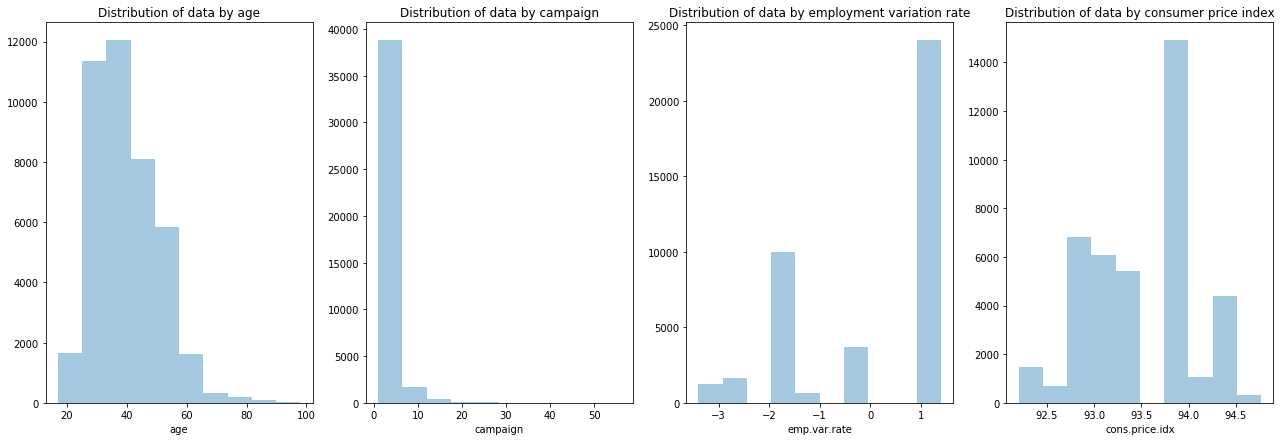

In [12]:
# Distribution of numerical data 
plt.rcParams['figure.figsize'] = (22, 7)
fig, ax = plt.subplots(1, 4)
sns.distplot(bank.loc[:, 'age'], bins = 10, kde = False, ax = ax[0]).set_title('Distribution of data by age')
sns.distplot(bank.loc[:, 'campaign'], bins = 10, kde = False, ax = ax[1]).set_title('Distribution of data by campaign')
sns.distplot(bank.loc[:, 'emp.var.rate'], bins = 10, kde = False, ax = ax[2]).set_title('Distribution of data by employment variation rate')
sns.distplot(bank.loc[:, 'cons.price.idx'], bins = 10, kde = False, ax = ax[3]).set_title('Distribution of data by consumer price index')

Text(0.5, 1, 'Outcome depending on the age')

(0, 20)

Text(0.5, 1, 'Outcome depending on the number of contacts performed')

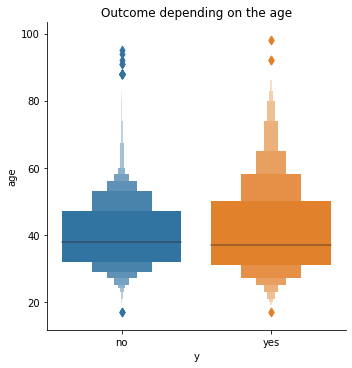

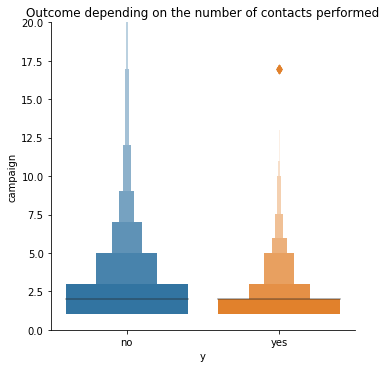

In [13]:
plt.rcParams['figure.figsize'] = (22, 7)
sns.catplot(x = 'y', y = 'age', kind = 'boxen', data = bank)
plt.title('Outcome depending on the age')
sns.catplot(x = 'y', y = 'campaign', kind = 'boxen', data = bank)
plt.ylim(0, 20)
plt.title('Outcome depending on the number of contacts performed')

In [14]:
bank.describe(include = ['O'])     # For categorical columns

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [15]:
bank.groupby(['job', 'y'])['y'].count()
"Percentage of administrative people who are subscribing are: " + str((1352/(1352+9070))*100) + " %"
"Percentage of blue-collar people who are subscribing are: " + str((638/(638+8616))*100) + " %"
"Percentage of entrepreneur people who are subscribing are: " + str((124/(124+1332))*100) + " %"
"Percentage of housemaid people who are subscribing are: " + str((106/(106+954))*100) + " %"
"Percentage of management people who are subscribing are: " + str((328/(328+2596))*100) + " %"
"Percentage of retired people who are subscribing are: " + str((434/(434+1286))*100) + " %"
"Percentage of self-employed people who are subscribing are: " + str((149/(149+1272))*100) + " %"
"Percentage of services people who are subscribing are: " + str((323/(323+3646))*100) + " %"
"Percentage of student people who are subscribing are: " + str((275/(275+600))*100) + " %"
"Percentage of technician people who are subscribing are: " + str((730/(730+6013))*100) + " %"
"Percentage of unemployed people who are subscribing are: " + str((144/(144+870))*100) + " %"
"Percentage of unknown people who are subscribing are: " + str((37/(37+293))*100) + " %"

job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
Name: y, dtype: int64

'Percentage of administrative people who are subscribing are: 12.972558050278257 %'

'Percentage of blue-collar people who are subscribing are: 6.894315971471795 %'

'Percentage of entrepreneur people who are subscribing are: 8.516483516483516 %'

'Percentage of housemaid people who are subscribing are: 10.0 %'

'Percentage of management people who are subscribing are: 11.21751025991792 %'

'Percentage of retired people who are subscribing are: 25.232558139534884 %'

'Percentage of self-employed people who are subscribing are: 10.48557353976073 %'

'Percentage of services people who are subscribing are: 8.138070042831949 %'

'Percentage of student people who are subscribing are: 31.428571428571427 %'

'Percentage of technician people who are subscribing are: 10.826041821147857 %'

'Percentage of unemployed people who are subscribing are: 14.201183431952662 %'

'Percentage of unknown people who are subscribing are: 11.212121212121213 %'

Students have the highest subscription rate at 31.42%, followed by retired people at 25.23%, and unemployed people at 14.20%

In [16]:
bank.groupby(['marital', 'y'])['y'].count()
"Percentage of divorced people who are subscribing are: " + str((476/(476+4136))*100) + " %"
"Percentage of married people who are subscribing are: " + str((2532/(2532+22396))*100) + " %"
"Percentage of single people who are subscribing are: " + str((1620/(1620+9948))*100) + " %"

marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948
          yes     1620
unknown   no        68
          yes       12
Name: y, dtype: int64

'Percentage of divorced people who are subscribing are: 10.320901994796184 %'

'Percentage of married people who are subscribing are: 10.157252888318355 %'

'Percentage of single people who are subscribing are: 14.004149377593361 %'

## Data Exploration and Preprocessing

In [17]:
bank.describe()                 
bank.describe(include = ['O'])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [18]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [19]:
# Checking the unique values in each categorical column 

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
uniq = []

for i in categorical_features:
    a = "Unique values for " + str(i) + " are: " + str(bank[i].unique())
    uniq.append(a)

uniq

["Unique values for job are: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'\n 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'\n 'student']",
 "Unique values for marital are: ['married' 'single' 'divorced' 'unknown']",
 "Unique values for education are: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'\n 'unknown' 'university.degree' 'illiterate']",
 "Unique values for default are: ['no' 'unknown' 'yes']",
 "Unique values for housing are: ['no' 'yes' 'unknown']",
 "Unique values for loan are: ['no' 'yes' 'unknown']",
 "Unique values for contact are: ['telephone' 'cellular']",
 "Unique values for month are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']",
 "Unique values for day_of_week are: ['mon' 'tue' 'wed' 'thu' 'fri']",
 "Unique values for poutcome are: ['nonexistent' 'failure' 'success']",
 "Unique values for y are: ['no' 'yes']"]

As seen from the data types output, we need to modify the features a little bit so that they are in the right format for our classification machine learning models. 

We will either one-hot encode the variables, or map it to values 0, 1, 2,..... etc. 

The variables we will one-hot encode are: 
        1. job
        2. marital
        3. education 
        4. default 
        5. housing
        6. loan
        7. contact
        8. month
        9. day_of_week
        10. poutcome

The variable which will be mapped is y, with 'no' being mapped to '0', and 'yes' being mapped to '1'

There are no null/missing values present in the dataset. 

In [20]:
# One-hot encoding

job = pd.get_dummies(bank['job'], columns = 'job', prefix = 'job')
marital = pd.get_dummies(bank['marital'], columns = 'marital', prefix = 'marital')
educ = pd.get_dummies(bank['education'], columns = 'education', prefix = 'educ')
default = pd.get_dummies(bank['default'], columns = 'default', prefix = 'default')
housing = pd.get_dummies(bank['housing'], columns = 'housing', prefix = 'housing')
loan = pd.get_dummies(bank['loan'], columns = 'loan', prefix = 'loan')
contact = pd.get_dummies(bank['contact'], columns = 'contact', prefix = 'contact')
month = pd.get_dummies(bank['month'], columns = 'month', prefix = 'month')
day = pd.get_dummies(bank['day_of_week'], columns = 'day_of_week', prefix = 'day_of_week')
poutcome = pd.get_dummies(bank['poutcome'], columns = 'poutcome', prefix = 'poutcome')

# Mapping
bank['y'] = bank['y'].map({'no': 0, 'yes': 1})

In [21]:
# Integrating the dummy variables with the original dataframe
bank = pd.concat([bank, job, marital, educ, default, housing, loan, contact, month, day, poutcome], axis = 1)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0


In [22]:
# Removing the original categorical variables to avoid the dummy variable trap

bank.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], axis = 1, inplace = True)
bank.head()
bank.shape

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


(41188, 64)

Data Preprocessing for the column 'pdays':

The feature 'pdays' signifies the number of days that passed by after the client was last contacted from a previous campaign.
The value '999' signifies that the cliet was not previously contacted. 

In [23]:
# Exploring the pdays column

bank.loc[:, 'pdays'].describe()
bank.groupby('pdays')['pdays'].count()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

pdays
0         15
1         26
2         61
3        439
4        118
5         46
6        412
7         60
8         18
9         64
10        52
11        28
12        58
13        36
14        20
15        24
16        11
17         8
18         7
19         3
20         1
21         2
22         3
25         1
26         1
27         1
999    39673
Name: pdays, dtype: int64

The majority of the values are 999 meaning the client was not previously contacted. We can transform this integer feature into a categorical feature of 4 categories: 

    1. Days from 0 to 10 will be categorized as '0-10' 
    2. Days from 11 to 20 will be categorized as '11-20' 
    3. Days from 21 to 27 will be categorized as '21-27'
    4. People who were not contacted will be categorized as 'No contact'

After converting them into categories, we can easily map them them. 'No-contact' will be mapped as 0. '0-10' will be mapped as 1. '11-20' will be mapped as 2. '21-27' will be mapped as 3. The variable will be mapped because there is a specific order to the number of days. 

In [24]:
bank['pdays1'] = 0

bank.shape

for i in range(len(bank.loc[:, 'pdays'])):
    if bank.loc[i, 'pdays'] == 999: 
        bank.loc[i, 'pdays1'] = 'No contact'
    elif (bank.loc[i, 'pdays'] >= 0) & (bank.loc[i, 'pdays'] <= 10):
        bank.loc[i, 'pdays1'] = '0-10'
    elif (bank.loc[i, 'pdays'] >= 11) & (bank.loc[i, 'pdays'] <= 20):
        bank.loc[i, 'pdays1'] = '11-20'
    elif (bank.loc[i, 'pdays'] >= 21) & (bank.loc[i, 'pdays'] <= 27):
        bank.loc[i, 'pdays1'] = '21-27'



(41188, 65)

In [25]:
bank.loc[:, 'pdays1'].dtype
bank.groupby('pdays1')['pdays1'].count()

dtype('O')

pdays1
0-10           1311
11-20           196
21-27             8
No contact    39673
Name: pdays1, dtype: int64

In [26]:
# Mapping the pdays1 variable

bank['pdays1'] = bank['pdays1'].map({'No contact': 0, '0-10': 1, '11-20': 2, '21-27': 3})
bank['pdays1'].unique()

array([0, 1, 2, 3])

In [27]:
bank.drop('pdays', axis = 1, inplace = True)

In [28]:
bank.dtypes

age                       int64
duration                  int64
campaign                  int64
previous                  int64
emp.var.rate            float64
cons.price.idx          float64
cons.conf.idx           float64
euribor3m               float64
nr.employed             float64
y                         int64
job_admin.                uint8
job_blue-collar           uint8
job_entrepreneur          uint8
job_housemaid             uint8
job_management            uint8
job_retired               uint8
job_self-employed         uint8
job_services              uint8
job_student               uint8
job_technician            uint8
job_unemployed            uint8
job_unknown               uint8
marital_divorced          uint8
marital_married           uint8
marital_single            uint8
marital_unknown           uint8
educ_basic.4y             uint8
educ_basic.6y             uint8
educ_basic.9y             uint8
educ_high.school          uint8
                         ...   
default_

In [29]:
# Percentage of unknown values in the dataset
#categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

#unkc_name = []
#unkc = []

#for i in categorical_features:
    #if len(np.unique((bank[i].unique() == 'unknown'))) == 2:
     #       calc = ((bank[i] == 'unknown').sum()/bank[i].count())*100
      #      unkc_name.append(i)
       #     unkc.append(calc)
        #    dfc = pd.DataFrame(
         #       {
          #          'column name': unkc_name,
           #         'values': unkc
            #    })

#dfc.head()

Text(0.5, 0, 'final Outcome')

Text(0, 0.5, 'Number of Occurrences')

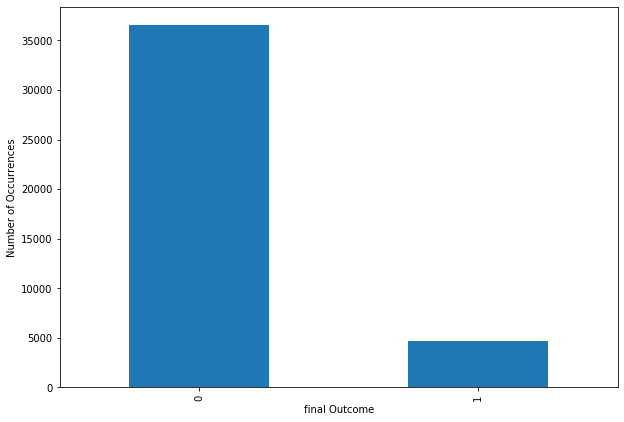

In [30]:
# Checking for any data imbalance in the target column

plt.rcParams['figure.figsize'] = (10, 7)
bank.groupby('y')['y'].count().plot(kind = 'bar')
plt.xlabel('final Outcome')
plt.ylabel('Number of Occurrences')

From the plot above, we can see that the dataset is highly imbalanced. There are almost 6 times as many 'no' cases as there are 'yes'. Therefore, for the classification task at hand, accuracy metric alone would not be a very good metric to evaluate the model. 
Since, this is a bank marketing dataset, we would like to invest in people who initiate a deposit to the bank. We would also like to minimize cases in which we predict that a person will initiate a deposit when they actually do not i.e. minimizing the False Positive cases. If we don't minimize these cases, the bank would be spending valuable resources investing in these people when they actually have no interest in investing. 

In other words, we would like to minimize our false positives or type 2 error. This is why, we will use the precision metric in order to evaluate our model in such cases. 

In [31]:
X = bank.loc[:, bank.columns != 'y']
y = bank.loc[:, bank.columns == 'y']
X = X.values
y = y.values
X.shape
y.shape

(41188, 63)

(41188, 1)

In [32]:
# Splitting the dataset

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [33]:
# Scaling the data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org) 

# KNeighbors Classifier (Knn)

In [34]:
classifier_knn = KNeighborsClassifier()

params_knn = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                      'weights': ['uniform', 'distance']}

grid_knn = GridSearchCV(classifier_knn, params_knn, cv = 5, scoring = 'accuracy', iid = False)

In [35]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=False, n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [36]:
print(grid_knn.best_score_)
print(grid_knn.best_params_)

0.8952656588224219
{'n_neighbors': 10, 'weights': 'uniform'}


After running the knn classifier, we can see that the best score we achieve is 89.52%, and the best parameters are: 

    1. n_neighbors: 10
    2. weights: uniform 

In [37]:
results_knn = pd.DataFrame(grid_knn.cv_results_)
results_knn.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.217653,0.050333,6.396808,0.396810,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.888939,0.891958,0.892413,0.890288,0.890423,0.890804,0.001249,8
1,0.205018,0.035195,6.311961,0.484427,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.866940,0.869499,0.869954,0.868134,0.872818,0.869469,0.001982,18
2,0.221024,0.031179,7.920129,0.498121,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.885753,0.888771,0.889985,0.888316,0.893762,0.889317,0.002616,10
3,0.214805,0.039918,7.285005,0.512204,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.876953,0.878149,0.882246,0.881791,0.882987,0.880425,0.002407,17
4,0.211153,0.038005,8.768539,0.996208,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.889850,0.894234,0.894537,0.892564,0.894066,0.893050,0.001739,5
5,0.209634,0.037578,8.042277,0.464126,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.877105,0.879514,0.880121,0.881487,0.884049,0.880455,0.002289,16
6,0.206243,0.034258,8.822514,0.574865,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.887119,0.892261,0.893323,0.893171,0.895280,0.892231,0.002739,7
7,0.212207,0.036150,8.772530,0.592753,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.879988,0.884067,0.885888,0.884522,0.887085,0.884310,0.002407,15
8,0.207039,0.036912,9.564589,0.649084,6,uniform,"{'n_neighbors': 6, 'weights': 'uniform'}",0.890153,0.893020,0.893475,0.893020,0.895432,0.893020,0.001688,6
9,0.208306,0.035473,9.319532,0.647268,6,distance,"{'n_neighbors': 6, 'weights': 'distance'}",0.880291,0.884825,0.886798,0.885584,0.887540,0.885008,0.002539,14


In [38]:
y_pred_knn = grid_knn.predict(X_train)
confusion_matrix(y_train, y_pred_knn)

array([[28952,   277],
       [ 2928,   793]])

From the above confusion matrix, we can see that the amount of False Positives we have is 277. Since for our problem, we need to minimize cases where we are investing in customers who have no intention of initiating a deposit, we need to minimize the False Positives as much as we can. 

In [39]:
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     29229
           1       0.74      0.21      0.33      3721

    accuracy                           0.90     32950
   macro avg       0.82      0.60      0.64     32950
weighted avg       0.89      0.90      0.88     32950



Here, we can see that the precision on correctly guessing the label '1' is approximately 74%. We need to increase the precision without compromising on the overall accuracy. One way the precision can be increased is by decreasing the number of false positives.

In [40]:
roc_auc_score(y_train, y_pred_knn)

0.6018189323538435

In [41]:
y_train_prob = grid_knn.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_train_prob[:,1])
threshold

array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

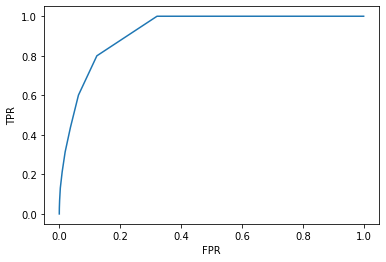

In [42]:
%matplotlib inline

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

Data Post Processing

In [45]:
y_train_prob[:,1]
y_pred = np.where(y_train_prob[:,1] > 0.7, 1, 0)
y_pred
confusion_matrix(y_train, y_pred)
print(classification_report(y_train, y_pred))

array([0.1, 0. , 0.6, ..., 0.7, 0. , 0. ])

array([0, 0, 0, ..., 0, 0, 0])

array([[29198,    31],
       [ 3468,   253]])

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     29229
           1       0.89      0.07      0.13      3721

    accuracy                           0.89     32950
   macro avg       0.89      0.53      0.53     32950
weighted avg       0.89      0.89      0.85     32950



By increasing the predict_proba threshold from the default value of 50% to 70%, we have significantly increased our precision and decreased our false positive cases. The model only labels an instance as '1' when the predicted probability of it being '1' is more than 70%. Increasing the precision, for label '1', from 74% to 89% did not significantly change the overall model accuracy of 89%. 

# Logistic Regression 

In [46]:
classifier_logistic = LogisticRegression(random_state = 0)

params_logistic = {'C': [0.01, 0.1, 1, 10, 25],
                  'solver': ['liblinear', 'sag']}

grid_logistic = GridSearchCV(classifier_logistic, params_logistic, cv = 5, scoring = 'accuracy')

In [47]:
grid_logistic.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 25],
                         'solver': ['liblinear', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [48]:
print(grid_logistic.best_score_)
print(grid_logistic.best_params_)

0.9094688922610015
{'C': 25, 'solver': 'sag'}


After running the logistic regression model, the model produced an accuracy of 90%, and the following parameters were the best: 

    1. C: 25
    2. solver: sag

In [49]:
results_logistic = pd.DataFrame(grid_logistic.cv_results_)
results_logistic.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.126464,0.106037,0.001296,0.000897,0.01,liblinear,"{'C': 0.01, 'solver': 'liblinear'}",0.897132,0.898483,0.898938,0.898179,0.898164,0.898179,0.000594,10
1,0.206221,0.014614,0.000989,0.000184,0.01,sag,"{'C': 0.01, 'solver': 'sag'}",0.897284,0.898634,0.898938,0.898179,0.898771,0.898361,0.000595,9
2,0.110137,0.008472,0.000770,0.000029,0.1,liblinear,"{'C': 0.1, 'solver': 'liblinear'}",0.902443,0.905008,0.904401,0.903490,0.906359,0.904340,0.001330,8
3,0.278469,0.008671,0.000784,0.000016,0.1,sag,"{'C': 0.1, 'solver': 'sag'}",0.902594,0.905008,0.904401,0.903642,0.906207,0.904370,0.001222,7
4,0.179219,0.009993,0.000826,0.000012,1,liblinear,"{'C': 1, 'solver': 'liblinear'}",0.906084,0.910622,0.905615,0.907436,0.908787,0.907709,0.001830,6
5,0.573597,0.028471,0.000788,0.000024,1,sag,"{'C': 1, 'solver': 'sag'}",0.906084,0.910622,0.905766,0.907436,0.908939,0.907769,0.001815,5
6,0.211437,0.019865,0.000829,0.000021,10,liblinear,"{'C': 10, 'solver': 'liblinear'}",0.908208,0.910015,0.908649,0.908649,0.911367,0.909378,0.001166,2
7,0.954324,0.188747,0.000861,0.000086,10,sag,"{'C': 10, 'solver': 'sag'}",0.908208,0.909712,0.908649,0.908649,0.911367,0.909317,0.001138,4
8,0.224450,0.025819,0.000832,0.000027,25,liblinear,"{'C': 25, 'solver': 'liblinear'}",0.908663,0.910319,0.908194,0.908042,0.911671,0.909378,0.001403,2
9,0.999066,0.208931,0.000793,0.000023,25,sag,"{'C': 25, 'solver': 'sag'}",0.908663,0.910470,0.908498,0.908042,0.911671,0.909469,0.001377,1


In [50]:
y_pred_logistic = grid_logistic.predict(X_train)
confusion_matrix(y_train, y_pred_logistic)

array([[28438,   791],
       [ 2185,  1536]])

The number of false positives for the logistic regression model is 791. Since we want to minimize our type 1 error, we have to bring the number false positive cases down. 

In [51]:
print(classification_report(y_train, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     29229
           1       0.66      0.41      0.51      3721

    accuracy                           0.91     32950
   macro avg       0.79      0.69      0.73     32950
weighted avg       0.90      0.91      0.90     32950



In [52]:
roc_auc_score(y_train, y_pred_logistic)

0.6928650479281157

In [53]:
y_train_prob = grid_logistic.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_train_prob[:,1])

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

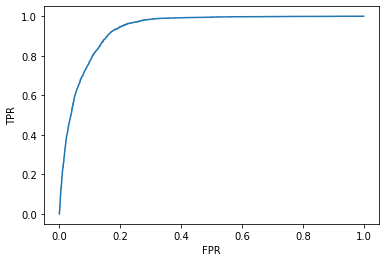

In [54]:
%matplotlib inline

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

Data Postprocessing

In [55]:
y_train_prob[:,1]
y_pred = np.where(y_train_prob[:,1] > 0.8, 1, 0)
y_pred
confusion_matrix(y_train, y_pred)
print(classification_report(y_train, y_pred))

array([0.17061553, 0.01237224, 0.57661282, ..., 0.29592148, 0.01544387,
       0.00924965])

array([0, 0, 0, ..., 0, 0, 0])

array([[29009,   220],
       [ 3132,   589]])

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     29229
           1       0.73      0.16      0.26      3721

    accuracy                           0.90     32950
   macro avg       0.82      0.58      0.60     32950
weighted avg       0.88      0.90      0.87     32950



By increasing the predict_proba threshold from the default value of 50% to 80%, we have significantly increased our precision and decreased our false positive cases. The model only labels an instance as '1' when the predicted probability of it being '1' is more than 80%. Increasing the precision, for label '1', from 67% to 73% did not significantly change the overall model accuracy of approximately 90%. 

# Linear Support Vector Classifier

In [56]:
classifier_linearSVC = LinearSVC()

params_LinearSVC = {'C': [0.001, 0.01, 0.1, 1, 10, 25]}

grid_LinearSVC = GridSearchCV(classifier_linearSVC, params_LinearSVC, cv = 5, scoring = 'accuracy')

In [57]:
grid_LinearSVC.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [58]:
print(grid_LinearSVC.best_score_)
print(grid_LinearSVC.best_params_)

0.9079817905918057
{'C': 25}


Linear SVC model gives an accuracy of 90.75% and the best value for the penalty parameter 'C' is 25. 

In [59]:
results_LinearSVC = pd.DataFrame(grid_LinearSVC.cv_results_)
results_LinearSVC.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.066121,0.010621,0.001158,0.000225,0.001,{'C': 0.001},0.898195,0.899241,0.900000,0.898179,0.899681,0.899059,0.000752,6
1,0.053313,0.001403,0.000753,0.000022,0.01,{'C': 0.01},0.900470,0.902731,0.902124,0.901062,0.904841,0.902246,0.001519,5
2,0.104958,0.009427,0.000787,0.000075,0.1,{'C': 0.1},0.904870,0.908346,0.905311,0.906222,0.909091,0.906768,0.001668,4
3,0.724380,0.131130,0.000853,0.000043,1,{'C': 1},0.905477,0.910015,0.906222,0.906222,0.909243,0.907436,0.001828,2
4,2.237352,0.045726,0.000847,0.000034,10,{'C': 10},0.904870,0.910470,0.906070,0.906373,0.909091,0.907375,0.002074,3
5,2.726510,0.046453,0.000840,0.000039,25,{'C': 25},0.906843,0.908346,0.906677,0.907132,0.910912,0.907982,0.001577,1


In [60]:
y_pred_LinearSVC = grid_LinearSVC.predict(X_train)
confusion_matrix(y_train, y_pred_LinearSVC)

array([[28587,   642],
       [ 2420,  1301]])

The number of false positives for the Linear SVC model is 642. Since we want to minimize our type 1 error, we have to bring down the number false positive cases. 

In [61]:
print(classification_report(y_train, y_pred_LinearSVC))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     29229
           1       0.67      0.35      0.46      3721

    accuracy                           0.91     32950
   macro avg       0.80      0.66      0.70     32950
weighted avg       0.89      0.91      0.89     32950



In [62]:
roc_auc_score(y_train, y_pred_LinearSVC)

0.6638363534891871

In [64]:
y_train_df = grid_LinearSVC.decision_function(X_train)

In [65]:
fpr, tpr, threshold = roc_curve(y_train, y_train_df)
threshold

array([ 5.26594969,  4.26594969,  3.36395644, ..., -1.34115994,
       -1.34116855, -1.83292803])

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

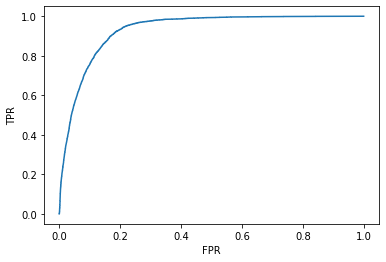

In [66]:
%matplotlib inline

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

Data Postprocessing

In [67]:
y_pred = np.where(y_train_df > 0.5, 1, 0)
confusion_matrix(y_train, y_pred)
print(classification_report(y_train, y_pred))

array([[29116,   113],
       [ 3278,   443]])

              precision    recall  f1-score   support

           0       0.90      1.00      0.94     29229
           1       0.80      0.12      0.21      3721

    accuracy                           0.90     32950
   macro avg       0.85      0.56      0.58     32950
weighted avg       0.89      0.90      0.86     32950



By increasing the decision_function threshold from the default value of 0 to 0.5, we have significantly increased our precision for label 1, and decreased our false positive cases. Increasing the precision, for label '1', from 67% to 80% did not significantly change the overall model accuracy of approximately 90%. 

# Kernel SVC

In [68]:
classifier_SVC = SVC(random_state = 0)

params_SVC = {'gamma': [0.01, 0.1, 1, 10],
              'C': [0.01, 0.1, 1, 10],
             'kernel': ['rbf', 'linear']}

grid_SVC = GridSearchCV(classifier_SVC, params_SVC, cv = 5, scoring = 'accuracy')

In [69]:
grid_SVC.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [70]:
print(grid_SVC.best_score_)
print(grid_SVC.best_params_)

0.9040364188163885
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


The Support Vector Classifier produced an accuracy of 90.40% after training. The best parameters are as follows: 

    1. C: 10
    2. gamma: 0.1
    3. kernel: rbf

In [71]:
results_SVC = pd.DataFrame(grid_SVC.cv_results_)
results_SVC.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.744731,0.086252,2.290090,0.016603,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.886967,0.887102,0.887102,0.887102,0.887085,0.887071,0.000053,22
1,10.822977,0.292382,1.606768,0.015809,0.01,0.01,linear,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}",0.896526,0.898027,0.897269,0.895448,0.899378,0.897329,0.001332,12
2,14.731731,0.225965,2.418219,0.005625,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.886967,0.887102,0.887102,0.887102,0.887085,0.887071,0.000053,22
3,10.788246,0.299259,1.595360,0.012149,0.01,0.1,linear,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}",0.896526,0.898027,0.897269,0.895448,0.899378,0.897329,0.001332,12
4,43.771638,0.328503,5.467799,0.022432,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.886967,0.887102,0.887102,0.887102,0.887085,0.887071,0.000053,22
5,10.792798,0.084717,1.622014,0.019808,0.01,1,linear,"{'C': 0.01, 'gamma': 1, 'kernel': 'linear'}",0.896526,0.898027,0.897269,0.895448,0.899378,0.897329,0.001332,12
6,68.211766,3.342141,8.006581,0.133580,0.01,10,rbf,"{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}",0.886967,0.887102,0.887102,0.887102,0.887085,0.887071,0.000053,22
7,10.889797,0.091245,1.593304,0.014233,0.01,10,linear,"{'C': 0.01, 'gamma': 10, 'kernel': 'linear'}",0.896526,0.898027,0.897269,0.895448,0.899378,0.897329,0.001332,12
8,14.148614,0.095537,2.329673,0.039673,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.886967,0.887102,0.887102,0.887102,0.887085,0.887071,0.000053,22
9,11.433968,0.172977,1.537882,0.010819,0.1,0.01,linear,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}",0.896222,0.898179,0.897420,0.895448,0.899378,0.897329,0.001392,12


In [72]:
y_pred_SVC = grid_SVC.predict(X_train)
confusion_matrix(y_train, y_pred_SVC)

array([[28870,   359],
       [ 1603,  2118]])

The number of false positives for the SVC model is 359. Since we want to minimize our type 1 error, we have to bring down the number false positive cases. 

In [73]:
print(classification_report(y_train, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     29229
           1       0.86      0.57      0.68      3721

    accuracy                           0.94     32950
   macro avg       0.90      0.78      0.83     32950
weighted avg       0.94      0.94      0.94     32950



So far, kernel SVC has the highest precision, for label 1, than any of the previous models. The precision produced for label 1 is 86%

In [74]:
roc_auc_score(y_train, y_pred_SVC)

0.7784597525573227

In [75]:
y_train_df = grid_SVC.decision_function(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_train_df)
threshold

array([ 6.17536414,  5.17536414,  4.48278685, ..., -2.46681458,
       -2.46689224, -3.57623923])

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

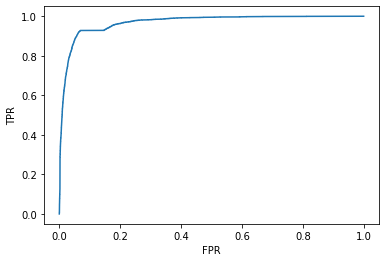

In [76]:
%matplotlib inline

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

Data Postprocessing

In [77]:
y_pred = np.where(y_train_df > 0.8, 1, 0)
confusion_matrix(y_train, y_pred)
print(classification_report(y_train, y_pred))

array([[29135,    94],
       [ 2513,  1208]])

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     29229
           1       0.93      0.32      0.48      3721

    accuracy                           0.92     32950
   macro avg       0.92      0.66      0.72     32950
weighted avg       0.92      0.92      0.90     32950



By increasing the decision_function threshold from the default value of 0 to 0.8, we have significantly increased our precision for label 1, and decreased our false positive cases. Increasing the precision, for label '1', from 86% to 93% did not significantly change the overall model accuracy of approximately 92%. 

# Decision Tree

In [78]:
classifier_DT = DecisionTreeClassifier(random_state = 0)

params_DT = {'max_depth': [1, 2, 4, 10, 25], 
            'criterion': ['gini', 'entropy'], 
            'max_features': ['auto', 'log2'], 
            'min_samples_split': [2, 4, 10, 25], 
            'min_samples_leaf': [2, 4, 10, 25]}

grid_DT = GridSearchCV(classifier_DT, params_DT, cv = 5, scoring = 'accuracy')

In [79]:
grid_DT.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 4, 10, 25],
                       

In [80]:
print(grid_DT.best_score_)
print(grid_DT.best_params_)

0.9045827010622155
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 25}


The Decision Tree model gave us an accuracy of 90.45%. The best parameters for the Decision Tree model are: 

    1. criterion: 'gini'
    2. max_depth: 10
    3. max_features: log2
    4. min_samples_leaf: 10
    5. min_samples_split: 25

In [81]:
results_DT = pd.DataFrame(grid_DT.cv_results_)
results_DT.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015095,0.005622,0.001795,0.000451,gini,1,auto,2,2,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.886967,0.887102,0.887102,0.887102,0.887085,0.887071,0.000053,225
1,0.010137,0.001040,0.001512,0.000295,gini,1,auto,2,4,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.886967,0.887102,0.887102,0.887102,0.887085,0.887071,0.000053,225
2,0.009367,0.000329,0.001234,0.000074,gini,1,auto,2,10,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.886967,0.887102,0.887102,0.887102,0.887085,0.887071,0.000053,225
3,0.007080,0.000068,0.001081,0.000032,gini,1,auto,2,25,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.886967,0.887102,0.887102,0.887102,0.887085,0.887071,0.000053,225
4,0.007146,0.000127,0.001291,0.000467,gini,1,auto,4,2,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.886967,0.887102,0.887102,0.887102,0.887085,0.887071,0.000053,225
5,0.007338,0.000311,0.001063,0.000003,gini,1,auto,4,4,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.886967,0.887102,0.887102,0.887102,0.887085,0.887071,0.000053,225
6,0.007116,0.000055,0.001086,0.000031,gini,1,auto,4,10,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.886967,0.887102,0.887102,0.887102,0.887085,0.887071,0.000053,225
7,0.007629,0.000382,0.001115,0.000042,gini,1,auto,4,25,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.886967,0.887102,0.887102,0.887102,0.887085,0.887071,0.000053,225
8,0.007208,0.000075,0.001065,0.000005,gini,1,auto,10,2,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.886967,0.887102,0.887102,0.887102,0.887085,0.887071,0.000053,225
9,0.007387,0.000379,0.001085,0.000028,gini,1,auto,10,4,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.886967,0.887102,0.887102,0.887102,0.887085,0.887071,0.000053,225


In [82]:
y_pred_DT = grid_DT.predict(X_train)
confusion_matrix(y_train, y_pred_DT)

array([[28448,   781],
       [ 2295,  1426]])

The number of false positives for the decision tree model is 781. Since we want to minimize our type 1 error, we have to bring down the number false positive cases. 

In [83]:
print(classification_report(y_train, y_pred_DT))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     29229
           1       0.65      0.38      0.48      3721

    accuracy                           0.91     32950
   macro avg       0.79      0.68      0.71     32950
weighted avg       0.89      0.91      0.90     32950



In [84]:
roc_auc_score(y_train, y_pred_DT)

0.6782551380567479

In [85]:
y_train_prob = grid_DT.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_train_prob[:,1])
threshold

array([2.        , 1.        , 0.92857143, 0.92      , 0.9       ,
       0.88888889, 0.88235294, 0.875     , 0.85714286, 0.82832618,
       0.82352941, 0.81818182, 0.8125    , 0.8       , 0.77272727,
       0.75      , 0.73684211, 0.72727273, 0.70967742, 0.7027027 ,
       0.7       , 0.69230769, 0.68181818, 0.65625   , 0.65      ,
       0.58823529, 0.58333333, 0.57894737, 0.57142857, 0.54545455,
       0.53521127, 0.53333333, 0.5327291 , 0.52173913, 0.52      ,
       0.50980392, 0.5       , 0.49107143, 0.48963731, 0.48484848,
       0.46666667, 0.45454545, 0.4375    , 0.43396226, 0.43137255,
       0.42708333, 0.41791045, 0.41666667, 0.4       , 0.39473684,
       0.39325843, 0.39285714, 0.39189189, 0.38461538, 0.38235294,
       0.375     , 0.36363636, 0.35185185, 0.325     , 0.31818182,
       0.3125    , 0.31034483, 0.3030303 , 0.28571429, 0.27272727,
       0.27100271, 0.26666667, 0.22200772, 0.21428571, 0.20849934,
       0.20472441, 0.20218579, 0.2       , 0.19622642, 0.19117

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

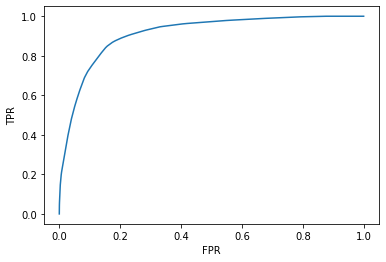

In [86]:
%matplotlib inline

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

Data Postprocessing 

In [87]:
y_train_prob[:,1]
y_pred = np.where(y_train_prob[:,1] > 0.8, 1, 0)
y_pred
confusion_matrix(y_train, y_pred)
print(classification_report(y_train, y_pred))

array([0.18181818, 0.04491018, 0.65625   , ..., 0.5327291 , 0.02671756,
       0.        ])

array([0, 0, 0, ..., 0, 0, 0])

array([[29160,    69],
       [ 3263,   458]])

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     29229
           1       0.87      0.12      0.22      3721

    accuracy                           0.90     32950
   macro avg       0.88      0.56      0.58     32950
weighted avg       0.90      0.90      0.86     32950



By increasing the predict_proba threshold from the default value of 50% to 80%, we have significantly increased our precision and decreased our false positive cases. The model only labels an instance as '1' when the predicted probability of it being '1' is more than 80%. Increasing the precision, for label '1', from 65% to 87% did not significantly change the overall model accuracy of approximately 90%. 

## Summary of all Classification Models

#### Knn Classifier

In [88]:
print('knn training accuracy: ' + str(grid_knn.score(X_train, y_train)))
print('knn testing accuracy: ' + str(grid_knn.score(X_test, y_test)))

knn training accuracy: 0.902731411229135
knn testing accuracy: 0.8997329448895363


Precision for label 1 in knn classifier: 89%

#### Logistic Regression Classifier

In [ ]:
print('Logistic regression training accuracy: ' + str(grid_logistic.score(X_train, y_train)))
print('Logistic regression testing accuracy: ' + str(grid_logistic.score(X_test, y_test)))

Precision for label 1 in Logistic regression classifier: 73%

#### Linear Support Vector Classifier

In [90]:
print('Linear SVC training accuracy: ' + str(grid_LinearSVC.score(X_train, y_train)))
print('Linear SVC testing accuracy: ' + str(grid_LinearSVC.score(X_test, y_test)))

Linear SVC training accuracy: 0.9070713201820941
Linear SVC testing accuracy: 0.9102937606215101


Precision for label 1 in Linear Support Vector Classifier: 80%

#### Kernel SVC

In [91]:
print('Kernel SVC training accuracy: ' + str(grid_SVC.score(X_train, y_train)))
print('Kernel SVC testing accuracy: ' + str(grid_SVC.score(X_test, y_test)))

Kernel SVC training accuracy: 0.9404552352048559
Kernel SVC testing accuracy: 0.9107793153678078


Precision for label 1 in Kernel SVC: 93%

#### Decision Tree Classifier

In [92]:
print('Decision Tree classifier training accuracy: ' + str(grid_DT.score(X_train, y_train)))
print('Decision Tree classifier testing accuracy: ' + str(grid_DT.score(X_test, y_test)))

Decision Tree classifier training accuracy: 0.9066464339908953
Decision Tree classifier testing accuracy: 0.9044671036659383


Precision for label 1 in Decision Tree classifier: 87%

For the training and testing dataset, Kernel SVC is the model which gives us the best results. The optimal hyperparameters for the Kernel SVC are: 

    1. C: 10
    2. gamma: 0.1
    3. kernel: rbf